In [37]:
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import pickle


np.set_printoptions(linewidth=150,threshold=1000)
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
print(x_test[1])
print(y_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

In [24]:
y = np.array([[1,2],[3,4],[5,6]])
y.shape

(3, 2)

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_train = x_train.flatten()
x_train = x_train.reshape(60000,1,28,28)

In [27]:
print(x_train.shape)

(60000, 1, 28, 28)


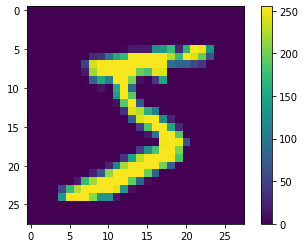

In [28]:
plt.figure()
plt.imshow(x_train[0][0])
plt.colorbar()
plt.show()

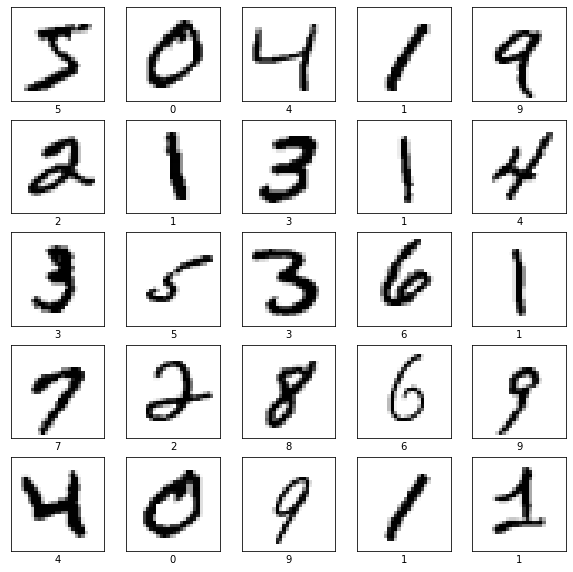

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i][0],cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [46]:
def sigmoid(x):
    return 1/ (1+ np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x)/ np.sum(np.exp(x), axis=0)
        return y.T
    
    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def init_network():
    with open("sample_weight.pkl","rb") as f:
        network = pickle.load(f)
        return network
    
def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b2
    y = softmax(a3)
    
    return y



In [45]:
# x_test = x_test.astype(np.float32)
# x_test /= 255.0
# x_test = x_test.flatten()
# x_test = x_test.reshape(-1,28,28)

# x , t = x_test,y_test
# network = init_network()
# acurracy_cnt = 0
# for i in range(len(x)):
#     y = predict(network,x[i])
#     p = np.argmax(y)
#     if p == t[i]:
#         acurracy_cnt +=1
        
# print("Accuracy:" + str(float(acurracy_cnt) / len(x)))

In [ ]:
# 배치 처리
x , t = x_test,y_test
network = init_network()
batch_size = 100
acurracy_cnt = 0
for i in range(0, len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis=1)
    acurracy_cnt += np.sum(p == t[i:i+batch_size])
    
# print("Accuracy:" + str(float(acurracy_cnt) / len(x)))

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x,axis=0)
        y = np.exp(x) / np.sum(np.exp(x),axis =0)
        return y.T
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))


def mean_squared_error(y,t):
	return 0.5 * np.sum((y - t)**2)

def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    
    if t.size == y.size:
        t = t.argmax(axis=1)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]))/ batch_size